## Gradient descent methods
#### 
introduction

#### 1.1 A simple quadratic function
Let's start by numerically optimize a simple two-dimensional function $ f(x) = x^2_1+x^2_2, \ x \in \R^", \ x= (x_1, x_2)^T. $ Since it's a convex function (we can notice it by the positive sign of the coefficient of x^2) it will have a single minimum, found where $ \nabla f(x) = 0$. Let's now find where the gradient is equal to zero.

$ \nabla f(x)= \Big( \frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}\Big)^T =(2x_{1},2x_{2})^T \\ 
\nabla f(x)=0 \\
\frac{\partial f}{\partial x_{1} = 2x_1 = 0, \ x_1 = 0 \\
\frac{\partial f}{\partial x_{2} = 2x_2 = 0, \ x_2 = 0 

$ 

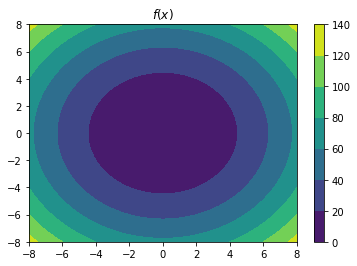

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Countour plot of fA(x)
x = np.linspace(-8.0, 8.0, 100)
y = np.linspace(-8.0, 8.0, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('$f(x)$')
plt.show()

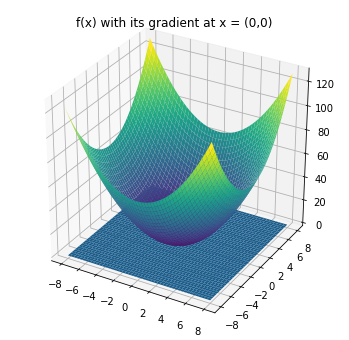

In [14]:
from turtle import color


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

def f(x1,x2):
  return x1**2 + x2**2

x1=np.linspace(-8,8,50)
x2=np.linspace(-8,8,50)
X, Y = np.meshgrid(x1,x2)
Z=f(X,Y)
eq = 0*X+0*Y

ax.plot_surface(X, Y, eq)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('f(x) with its gradient at x = (0,0)')
plt.show()

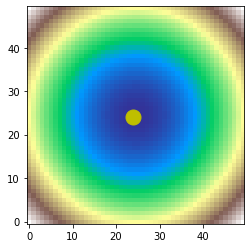

In [18]:
from IPython.core.display import HTML
import plotly
import plotly.graph_objects as go
#import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

z = f(X,Y)
matplotlib.pyplot.imshow(z,origin='lower',cmap='terrain')

# Find maximum value index in numpy array
indices = np.where(z == z.max())
#max_z_x_location, max_z_y_location = (indices[1][0],indices[0][0])
#matplotlib.pyplot.plot(max_z_x_location,max_z_y_location,'ro',markersize=15)

# Find minimum value index in numpy array
indices = np.where(z == z.min())
min_z_x_location, min_z_y_location = (indices[1][0],indices[0][0])
matplotlib.pyplot.plot(min_z_x_location,min_z_y_location,'yo',markersize=15)


In [19]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def sliding_window(arr, window_size):
    """ Construct a sliding window view of the array"""
    arr = np.asarray(arr)
    window_size = int(window_size)
    if arr.ndim != 2:
        raise ValueError("need 2-D input")
    if not (window_size > 0):
        raise ValueError("need a positive window size")
    shape = (arr.shape[0] - window_size + 1,
             arr.shape[1] - window_size + 1,
             window_size, window_size)
    if shape[0] <= 0:
        shape = (1, shape[1], arr.shape[0], shape[3])
    if shape[1] <= 0:
        shape = (shape[0], 1, shape[2], arr.shape[1])
    strides = (arr.shape[1]*arr.itemsize, arr.itemsize,
               arr.shape[1]*arr.itemsize, arr.itemsize)
    return as_strided(arr, shape=shape, strides=strides)

def cell_neighbours(arr, i, j, d):
    """Return d-th neighbors of cell (i, j)"""
    w = sliding_window(arr, 2*d+1)

    ix = np.clip(i - d, 0, w.shape[0]-1)
    jx = np.clip(j - d, 0, w.shape[1]-1)

    i0 = max(0, i - d - ix)
    j0 = max(0, j - d - jx)
    i1 = w.shape[2] - max(0, d - i + ix)
    j1 = w.shape[3] - max(0, d - j + jx)

    return w[ix, jx][i0:i1,j0:j1].ravel()

In [22]:

from dataclasses import dataclass

@dataclass
class descent_step:
    """Class for storing each step taken in gradient descent"""
    value: float
    x_index: float
    y_index: float

def gradient_descent_3d(array,x_start,y_start,steps=50,step_size=1,plot=False):
    # Initial point to start gradient descent at
    step = descent_step(array[y_start][x_start],x_start,y_start)
    
    # Store each step taken in gradient descent in a list
    step_history = []
    step_history.append(step)
    
    # Plot 2D representation of array with startng point as a red marker
    if plot:
        matplotlib.pyplot.imshow(array,origin='lower',cmap='terrain')
        matplotlib.pyplot.plot(x_start,y_start,'ro')
    current_x = x_start
    current_y = y_start

    # Loop through specified number of steps of gradient descent to take
    for i in range(steps):
        prev_x = current_x
        prev_y = current_y
        
        # Extract array of neighbouring cells around current step location with size nominated
        neighbours=cell_neighbours(array,current_y,current_x,step_size)
        
        # Locate minimum in array (steepest slope from current point)
        next_step = neighbours.min()
        indices = np.where(array == next_step)
        
        # Update current point to now be the next point after stepping
        current_x, current_y = (indices[1][0],indices[0][0])
        step = descent_step(array[current_y][current_x],current_x,current_y)
        
        step_history.append(step)
        
        # Plot each step taken as a black line to the current point nominated by a red marker
        if plot:
            matplotlib.pyplot.plot([prev_x,current_x],[prev_y,current_y],'k-')
            matplotlib.pyplot.plot(current_x,current_y,'ro')
            
        # If step is to the same location as previously, this infers convergence and end loop
        if prev_y == current_y and prev_x == current_x:
            print(f"Converged in {i} steps")
            break
    return next_step,step_history

Target: 0.05331112036651407 @ (array([24, 24, 25, 25], dtype=int64), array([24, 25, 24, 25], dtype=int64))
Converged in 11 steps
Optimal step size 1
Converged in 11 steps
Steps: [descent_step(value=20.73802582257392, x_index=38, y_index=28), descent_step(value=17.326114119117026, x_index=36, y_index=19), descent_step(value=13.914202415660133, x_index=35, y_index=20), descent_step(value=10.928779675135361, x_index=34, y_index=21), descent_step(value=8.369845897542689, x_index=33, y_index=22), descent_step(value=6.237401082882128, x_index=32, y_index=23), descent_step(value=4.531445231153681, x_index=30, y_index=21), descent_step(value=2.8254893794252407, x_index=29, y_index=22), descent_step(value=1.546022490628904, x_index=28, y_index=23), descent_step(value=0.69304456476468, x_index=27, y_index=24), descent_step(value=0.2665556018325686, x_index=26, y_index=24), descent_step(value=0.05331112036651407, x_index=24, y_index=24), descent_step(value=0.05331112036651407, x_index=24, y_index

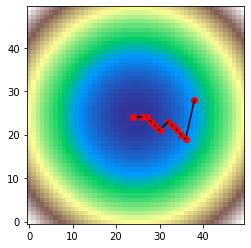

In [23]:
np.random.seed(42)
global_minimum = z.min()
indices = np.where(z == global_minimum)
print(f"Target: {global_minimum} @ {indices}")

step_size = 0
found_minimum = 99999

# Random starting point
start_x = np.random.randint(0,50)
start_y = np.random.randint(0,50)

# Increase step size until convergence on global minimum
while found_minimum != global_minimum:
    step_size += 1
    found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=False)

print(f"Optimal step size {step_size}")
found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=True)
print(f"Steps: {steps}")

In [24]:
def multiDimenDist(point1,point2):
   #find the difference between the two points, its really the same as below
   deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
   runningSquared = 0
   #because the pythagarom theorm works for any dimension we can just use that
   for coOrd in deltaVals:
       runningSquared += coOrd**2
   return runningSquared**(1/2)
def findVec(point1,point2,unitSphere = False):
  #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
  finalVector = [0 for coOrd in point1]
  for dimension, coOrd in enumerate(point1):
      #finding total differnce for that co-ordinate(x,y,z...)
      deltaCoOrd = point2[dimension]-coOrd
      #adding total difference
      finalVector[dimension] = deltaCoOrd
  if unitSphere:
      totalDist = multiDimenDist(point1,point2)
      unitVector =[]
      for dimen in finalVector:
          unitVector.append( dimen/totalDist)
      return unitVector
  else:
    return finalVector

In [28]:
def generate_3d_plot(step_history):
    # Initialise empty lists for markers
    step_markers_x = []
    step_markers_y = []
    step_markers_z = []
    step_markers_u = []
    step_markers_v = []
    step_markers_w = []
    
    for index, step in enumerate(step_history):
        step_markers_x.append(step.x_index)
        step_markers_y.append(step.y_index)
        step_markers_z.append(step.value)
        
        # If we haven't reached the final step, calculate the vector between the current step and the next step
        if index < len(steps)-1:
            vec1 = [step.x_index,step.y_index,step.value]
            vec2 = [steps[index+1].x_index,steps[index+1].y_index,steps[index+1].value]

            result_vector = findVec(vec1,vec2)
            step_markers_u.append(result_vector[0])
            step_markers_v.append(result_vector[1])
            step_markers_w.append(result_vector[2])
        else:
            step_markers_u.append(0.1)
            step_markers_v.append(0.1)
            step_markers_w.append(0.1)

    fig = go.Figure(data=[
            go.Cone(
            x=step_markers_x,
            y=step_markers_y,
            z=step_markers_z,
            u=step_markers_u,
            v=step_markers_v,
            w=step_markers_w,
            sizemode="absolute",
            sizeref=2,
            anchor='tail'),

            go.Scatter3d(
            x=step_markers_x,
            y=step_markers_y,
            z=step_markers_z,
            mode='lines',
            line=dict(
                color='red',
                width=2
            )),

            go.Surface(colorscale=color,z=Z,opacity=0.5)])


        # Z axis is limited to the extent of the terrain array
    fig.update_layout(
        title='Gradient Descent Steps',
        scene = dict(zaxis = dict(range=[z.min(),z.max()],),),)
    return fig
        
    # Generate 3D plot from previous random starting location
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='random_starting_point_3d_gradient_descent.html',include_plotlyjs='cdn'))

ValueError: 
    Invalid value of type 'builtins.function' received for the 'colorscale' property of surface
        Received value: <function color at 0x000001D9260468B0>

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


## 2 Newton descent method


#### 2.1 
The function that we are going to study now is $ f(X) = 100x_1^2 +x_2^2 $ for $ x \in \R^2, x = (x_1, x_2)^T $. We can notice that this function is convex since the coefficients of $ x_1**2, x_2**2 $ are positive, therefore we will only have one minimum.